In [88]:
#Problem 1 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
sb.set()
house_data=pd.read_csv("/Users/russell/NTU/Y2S2/MS0003/Tutorials/tut_3/train.csv")
#print(house_data.head())
houseGrLivArea=pd.DataFrame(house_data['GrLivArea'])
houseSalePrice=pd.DataFrame(house_data['SalePrice'])

<bound method DataFrame.corr of       GrLivArea  SalePrice
0          1710     208500
1          1262     181500
2          1786     223500
3          1717     140000
4          2198     250000
...         ...        ...
1455       1647     175000
1456       2073     210000
1457       2340     266500
1458       1078     142125
1459       1256     147500

[1460 rows x 2 columns]>

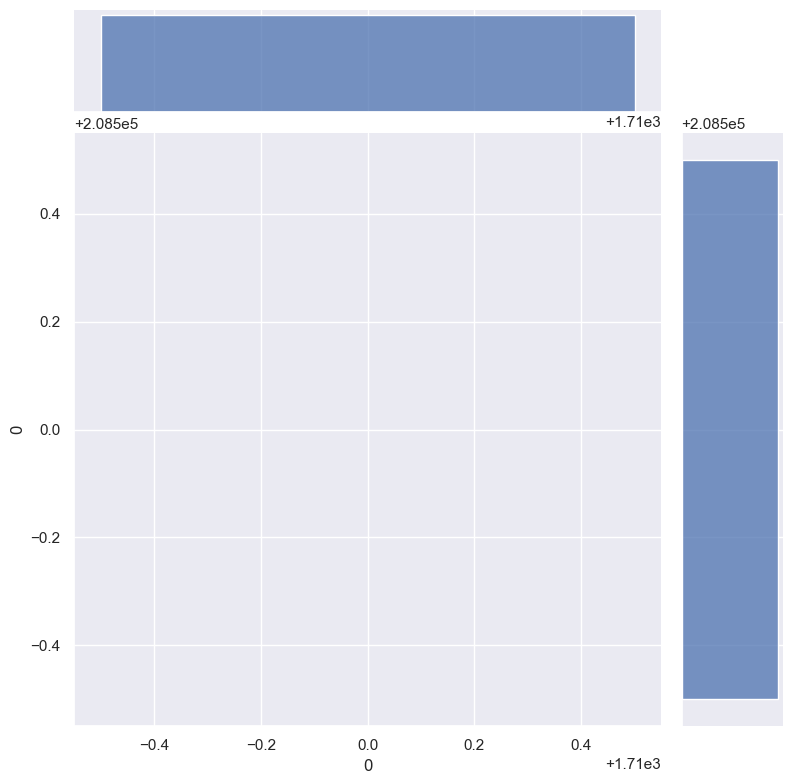

In [42]:
#1a)
houseGrLivArea_series =houseGrLivArea.iloc[0]
houseSalePrice_series=houseSalePrice.iloc[0]
sb.jointplot(x=houseGrLivArea_series,y=houseSalePrice_series,height=8)
#correlation coeff
joint=pd.concat([houseGrLivArea,houseSalePrice],axis=1, join='inner')
joint.corr # SalePrice vs GrLivArea coeff od 0.7086, extremely correlated

In [96]:
#1b&c) Training linear regression model
test_size = 1100 / 1460
houseGrLivArea_train, houseGrLivArea_test, houseSalePrice_train, houseSalePrice_test = train_test_split(
    houseGrLivArea, houseSalePrice, test_size=test_size, random_state=42)
# Verify lengths
print(len(houseGrLivArea_train), len(houseSalePrice_train))  
print(len(houseGrLivArea_test), len(houseSalePrice_test))

360 360
1100 1100


In [97]:
#d) model training
X_train = houseGrLivArea_train
X_test = houseGrLivArea_test
linreg=LinearRegression()
linreg.fit(X_train, houseSalePrice_train)
total_train_pred = linreg.predict(houseGrLivArea_train)

Intercept 	: b =  [24829.22034958]
Coefficients 	: a =  [[102.79192822]]


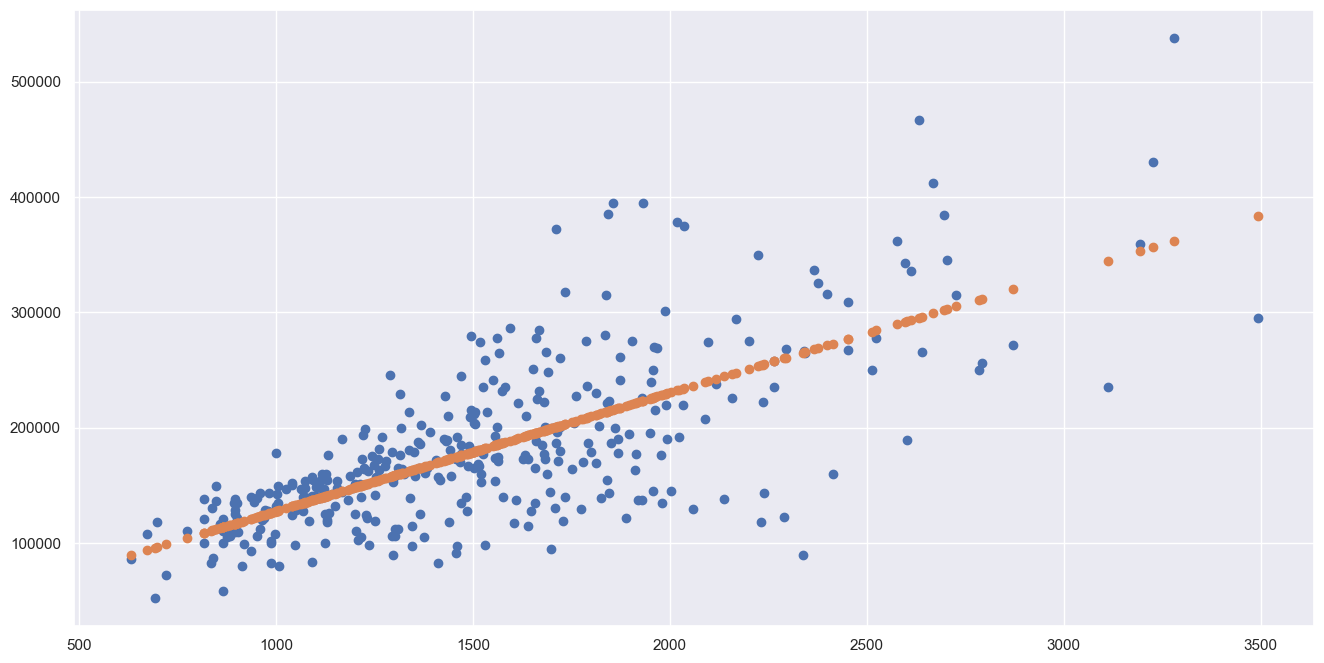

In [98]:
#e) Print the coefficients of the Linear Regression model you just fit, and plot the Regression line on a Scatterplot
#of houseGrLivArea_train and houseSalePrice_train using the standard slope-intercept form of straight line.
# Print the coefficients of the Linear Regression model 
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Plot the Linear Regression line
regline_x = X_train
regline_y = linreg.intercept_ + linreg.coef_ * X_train
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(X_train,houseSalePrice_train)
plt.scatter(regline_x, regline_y)
plt.show()

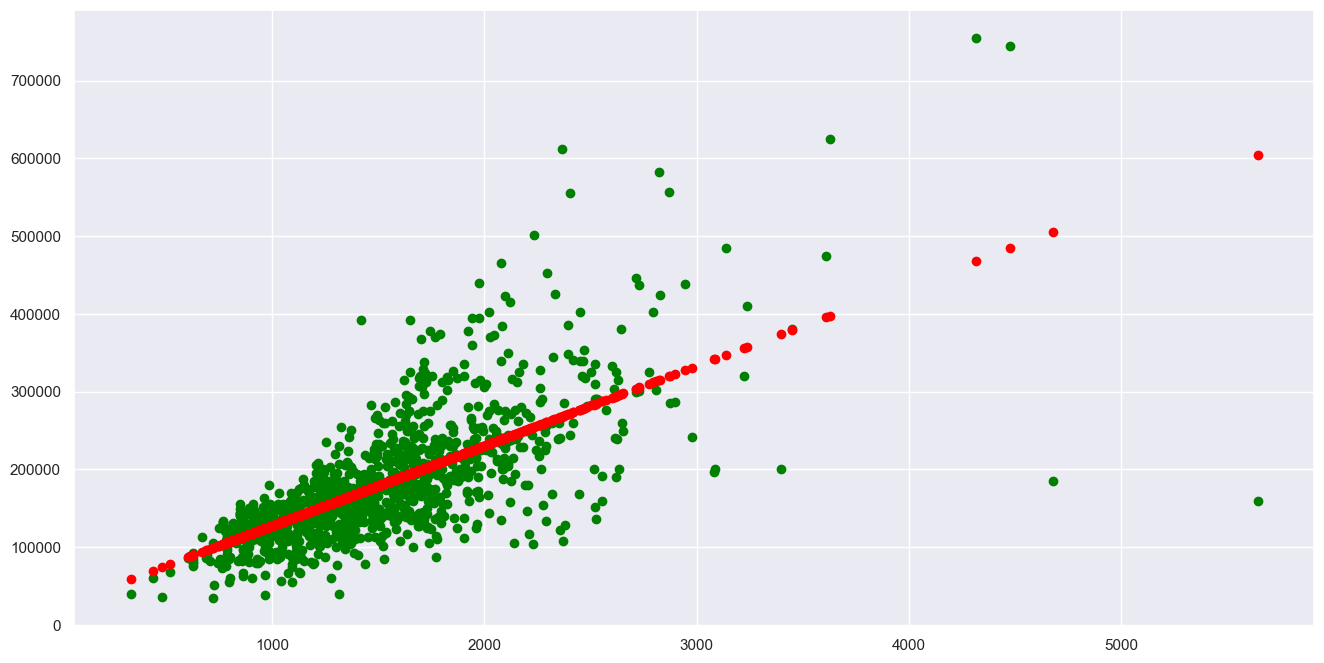

In [99]:
#f) Predict SalePrice for the test dataset houseGrLivArea_test using the Linear Regression model, and plot the
#predictions on the Scatterplot of houseGrLivArea_test and houseSalePrice_test to visualize the accuracy.
# Predict Total values corresponding using Test
total_test_pred = linreg.predict(houseGrLivArea_test)

# Plot the Predictions on test
f, axes = plt.subplots(1, 1, figsize=(16, 8))
plt.scatter(houseGrLivArea_test, houseSalePrice_test, color = "green")
plt.scatter(houseGrLivArea_test, total_test_pred, color = "red")
plt.show()

In [100]:
#g) Find the Explained Variance (R^2) of the model on the Train set and on the Test set to check Goodness of Fit.
print(f"\n Below is the R^2 and MSE for Train Set")
#Trainset (R^2) Calculation 
print("Explained Variance (R^2) \t:", linreg.score(X_train,houseSalePrice_train))

# Trainset Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_train, total_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print(f"\n Below is the R^2 and MSE for Test Set")
#Testset (R^2) Calculation 
print("Explained Variance (R^2) \t:", linreg.score(X_test,houseSalePrice_test))

# Testset Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(houseSalePrice_test, total_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


 Below is the R^2 and MSE for Train Set
Explained Variance (R^2) 	: 0.5185183659651689
Mean Squared Error (MSE) 	: 2510199575.922448
Root Mean Squared Error (RMSE) 	: 50101.891939551024

 Below is the R^2 and MSE for Test Set
Explained Variance (R^2) 	: 0.4969022673151898
Mean Squared Error (MSE) 	: 3352933231.771393
Root Mean Squared Error (RMSE) 	: 57904.51823278899


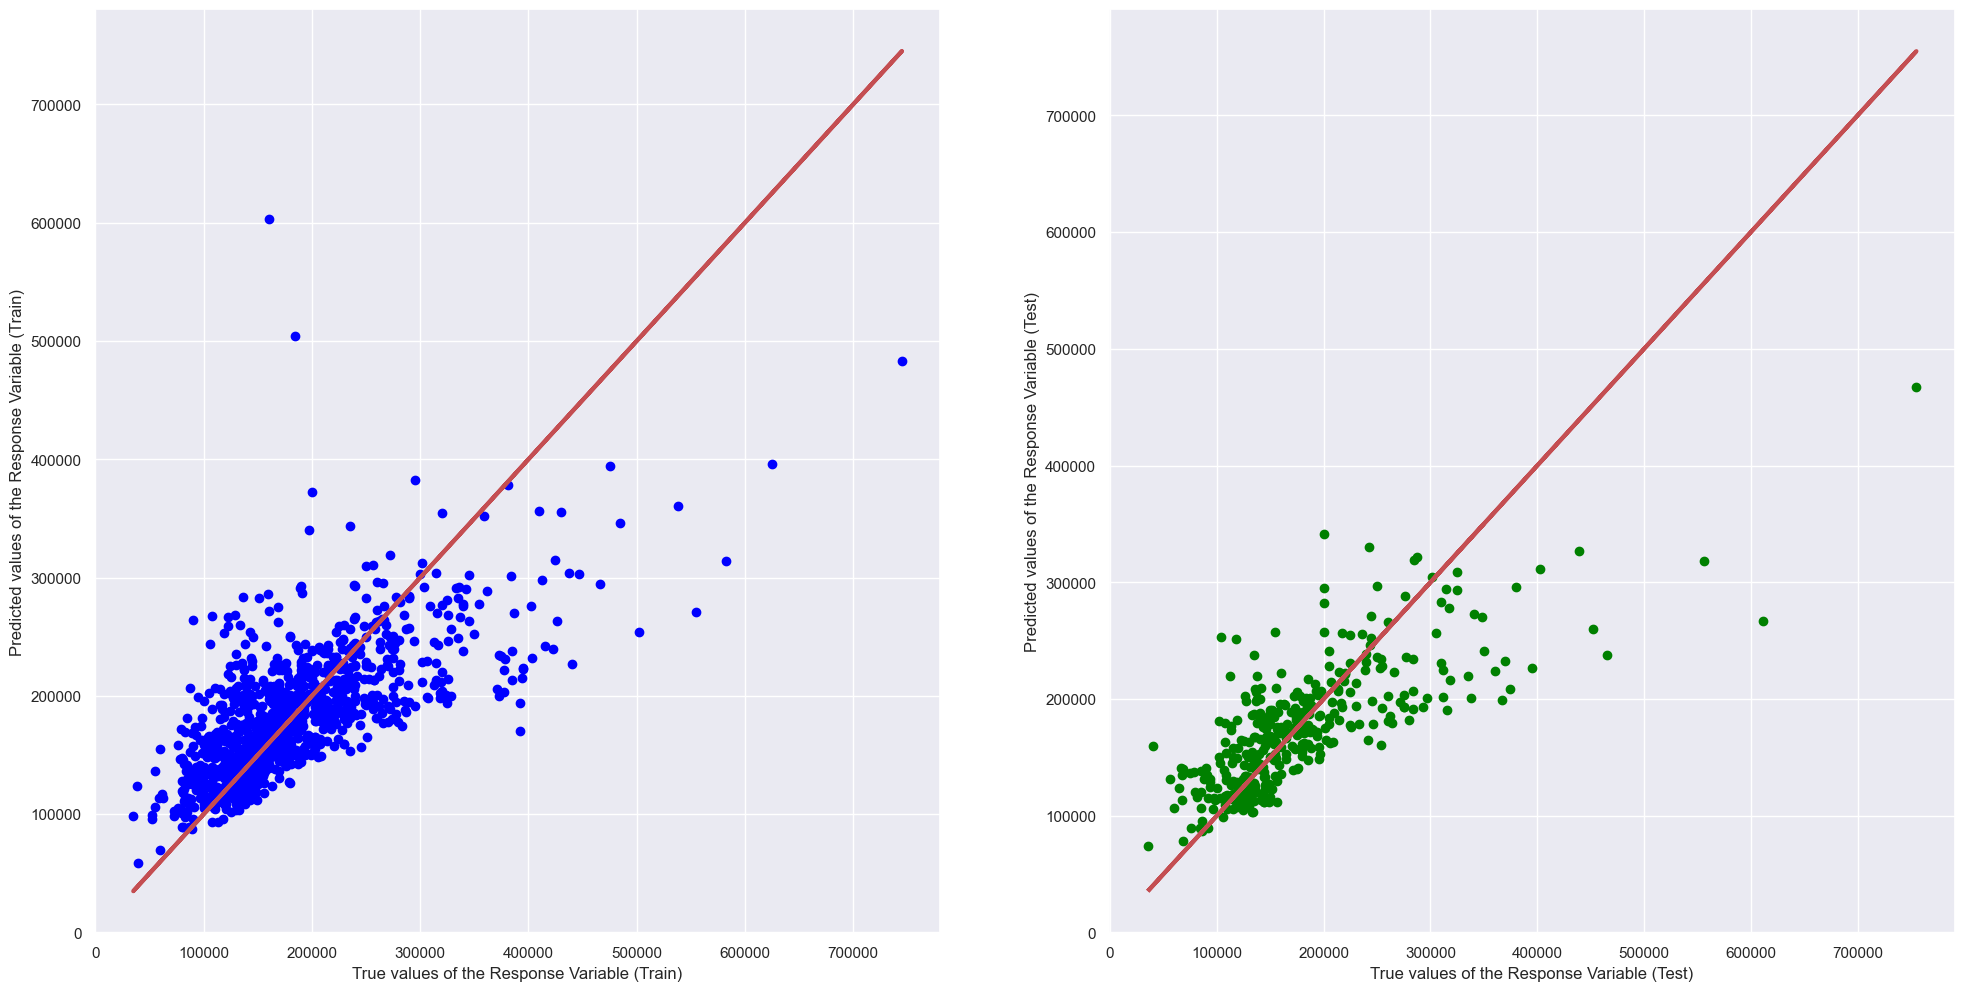

In [72]:
#h) Plot the True vs Predicted values of SalePrice for both the training and test sets.
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(houseSalePrice_train, y_train_pred, color = "blue")
axes[0].plot(houseSalePrice_train, houseSalePrice_train, 'r-', linewidth = 3)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(houseSalePrice_test, y_test_pred, color = "green")
axes[1].plot(houseSalePrice_test, houseSalePrice_test, 'r-', linewidth = 3)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

360 360
1100 1100
Intercept 	: b =  [-16151.27779099]
Coefficients 	: a =  [[ 64.43154202   0.23709613  43.49000112 105.7696555 ]]
    Predictors  Coefficients
0    GrLivArea     67.315655
1      LotArea      0.527510
2  TotalBsmtSF     58.439909
3   GarageArea     91.325844



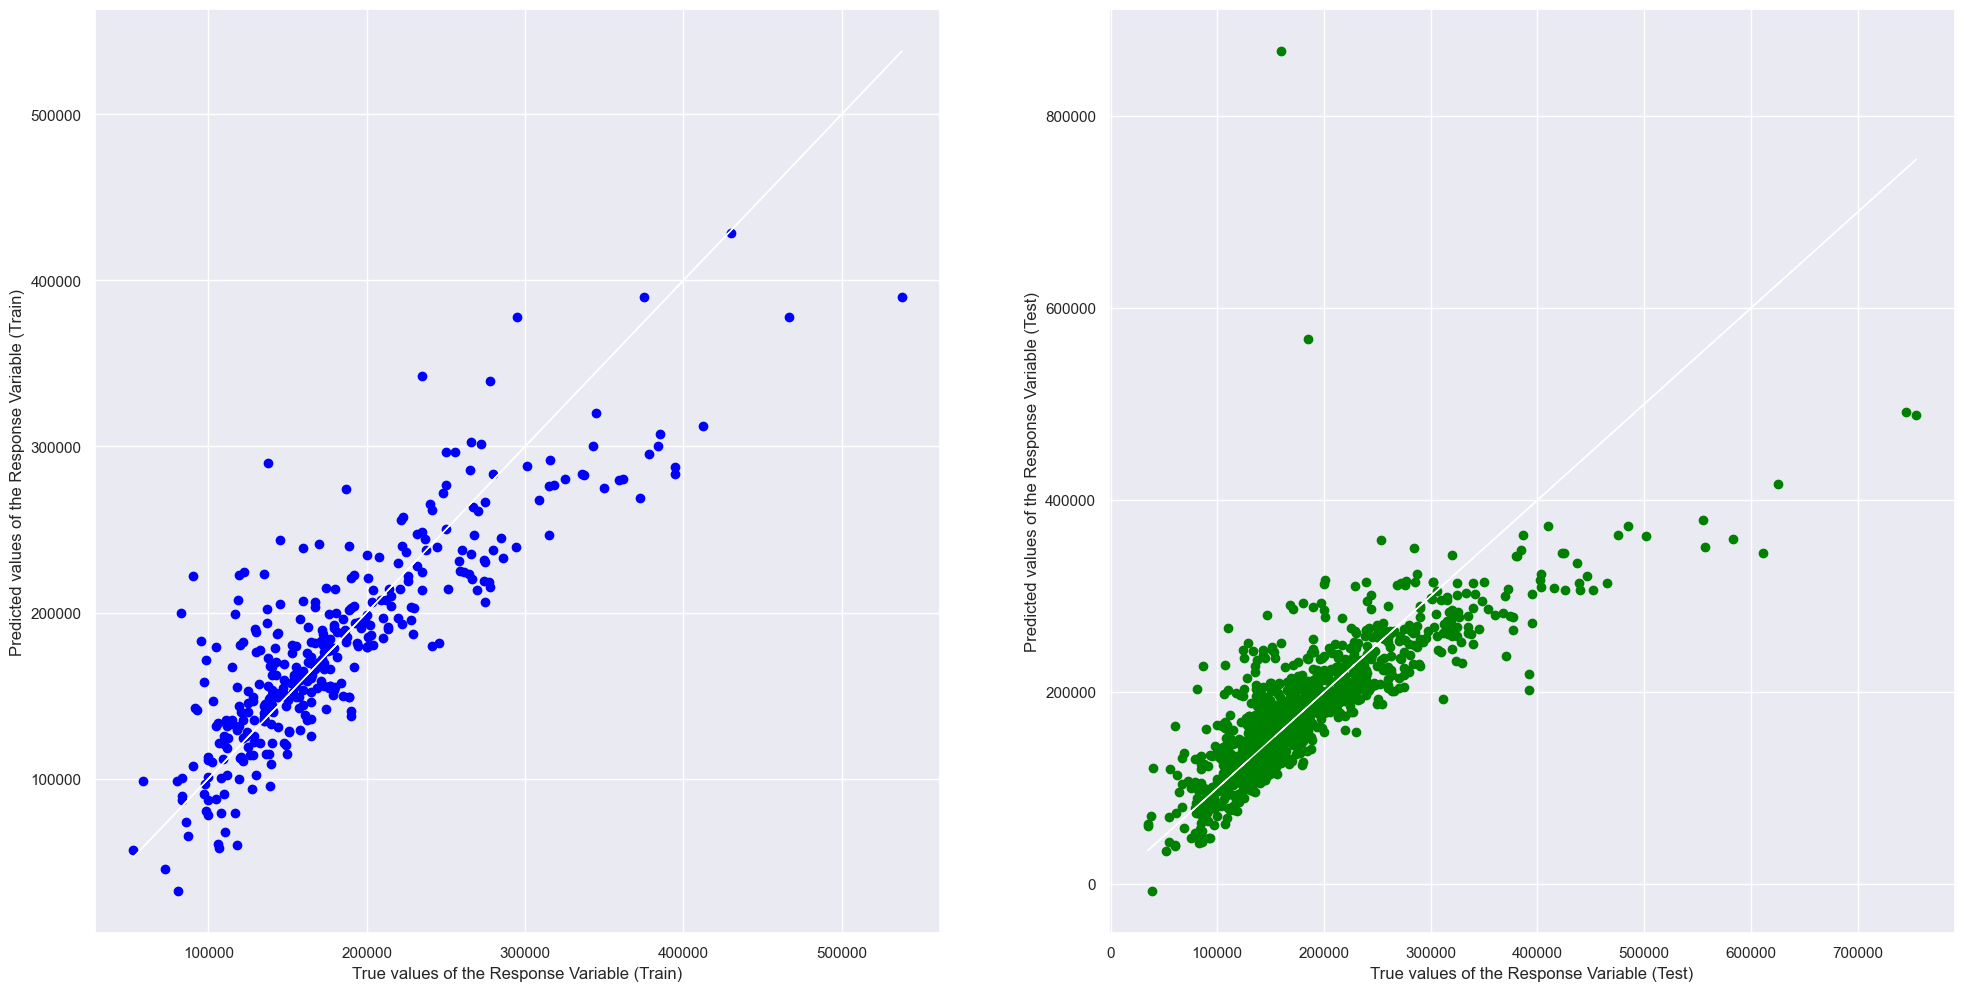

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7150733585005464
Mean Squared Error (MSE) 	: 1427938879.040426

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.647269563919616
Mean Squared Error (MSE) 	: 2395149723.206132



In [93]:
#problem 2 multi-variate 
#data preperation

y = pd.DataFrame(house_data['SalePrice'])
x =pd.DataFrame(house_data[['GrLivArea','LotArea', 'TotalBsmtSF','GarageArea']])

#trainset testsetsplit
test_size = 1100 / 1460
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=test_size, random_state=42)

# Verify lengths
print(len(x_train), len(y_train))  
print(len(x_test), len(y_test))  

#training the model
multilinreg=LinearRegression()
multilinreg.fit(x_train, y_train)
total_train_pred = multilinreg.predict(x_train)
#printing coeffs
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, multilinreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = multilinreg.predict(x_train)
y_test_pred = multilinreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()